<a href="https://colab.research.google.com/github/mephi82/grad_data_analysis/blob/main/simplenn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
import tensorflow as tf
from tensorflow.keras import layers, models

import numpy as np

1)XOR 데이터

2)Circular 데이터

In [83]:
# XOR
def load_XOR():
  x_train = np.array([[0., 0.],
                    [0., 1.],
                    [1., 0.],
                    [1., 1.]],
                    dtype=np.float32)

  y_train = np.array([[0.],
                    [1.],
                    [1.],
                    [0.]],
                    dtype=np.float32)
  return(x_train, y_train, 100)

# Circular
def load_circle():
  x_train = np.array([[0., 0.],
                    [0., 1.],
                    [1., 0.],
                    [1., 1.],
                    [0.5, 0.6],
                    [0.5, 0.4],
                    [0.4, 0.5],
                    [0.6, 0.5]],
                    dtype=np.float32)

  y_train = np.array([[0.],
                    [0.],
                    [0.],
                    [0.],
                    [1.],
                    [1.],
                    [1.],
                    [1.]
                    ],
                    dtype=np.float32)
  return(x_train, y_train, 800)

# x_train, y_train, n_epoch = load_XOR()
x_train, y_train, n_epoch = load_circle()



In [84]:
model = models.Sequential([
  tf.keras.Input(shape=(2,)),
  layers.Dense(32, activation='relu'),
  layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 32)                96        
                                                                 
 dense_15 (Dense)            (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [85]:
nx, ny = (10, 10)
x = np.linspace(0, 1, nx)
y = np.linspace(0, 1, ny)
xv, yv = np.meshgrid(x, y)
grid_points = np.vstack([xv.ravel(), yv.ravel()]).T
 

probas = []
class PredictionCallback(tf.keras.callbacks.Callback):    
  def on_epoch_end(self, epoch, logs={}):
    
    probas.append(self.model.predict(grid_points))
    # print('prediction: {} at epoch: {}'.format(y_pred, epoch))



In [86]:
model.compile(optimizer='SGD',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=n_epoch,  callbacks=[PredictionCallback()], batch_size=1)

Epoch 1/800
8/8 [==============================] - 0s 16ms/step - loss: 0.7108 - accuracy: 0.6250
Epoch 2/800
8/8 [==============================] - 0s 11ms/step - loss: 0.7094 - accuracy: 0.6250
Epoch 3/800
8/8 [==============================] - 0s 13ms/step - loss: 0.7077 - accuracy: 0.6250
Epoch 4/800
8/8 [==============================] - 0s 12ms/step - loss: 0.7063 - accuracy: 0.5000
Epoch 5/800
8/8 [==============================] - 0s 11ms/step - loss: 0.7049 - accuracy: 0.6250
Epoch 6/800
8/8 [==============================] - 0s 13ms/step - loss: 0.7037 - accuracy: 0.6250
Epoch 7/800
8/8 [==============================] - 0s 13ms/step - loss: 0.7025 - accuracy: 0.6250
Epoch 8/800
8/8 [==============================] - 0s 10ms/step - loss: 0.7013 - accuracy: 0.6250
Epoch 9/800
8/8 [==============================] - 0s 12ms/step - loss: 0.7005 - accuracy: 0.6250
Epoch 10/800
8/8 [==============================] - 0s 11ms/step - loss: 0.6996 - accuracy: 0.6250
Epoch 11/800
8/8 [=

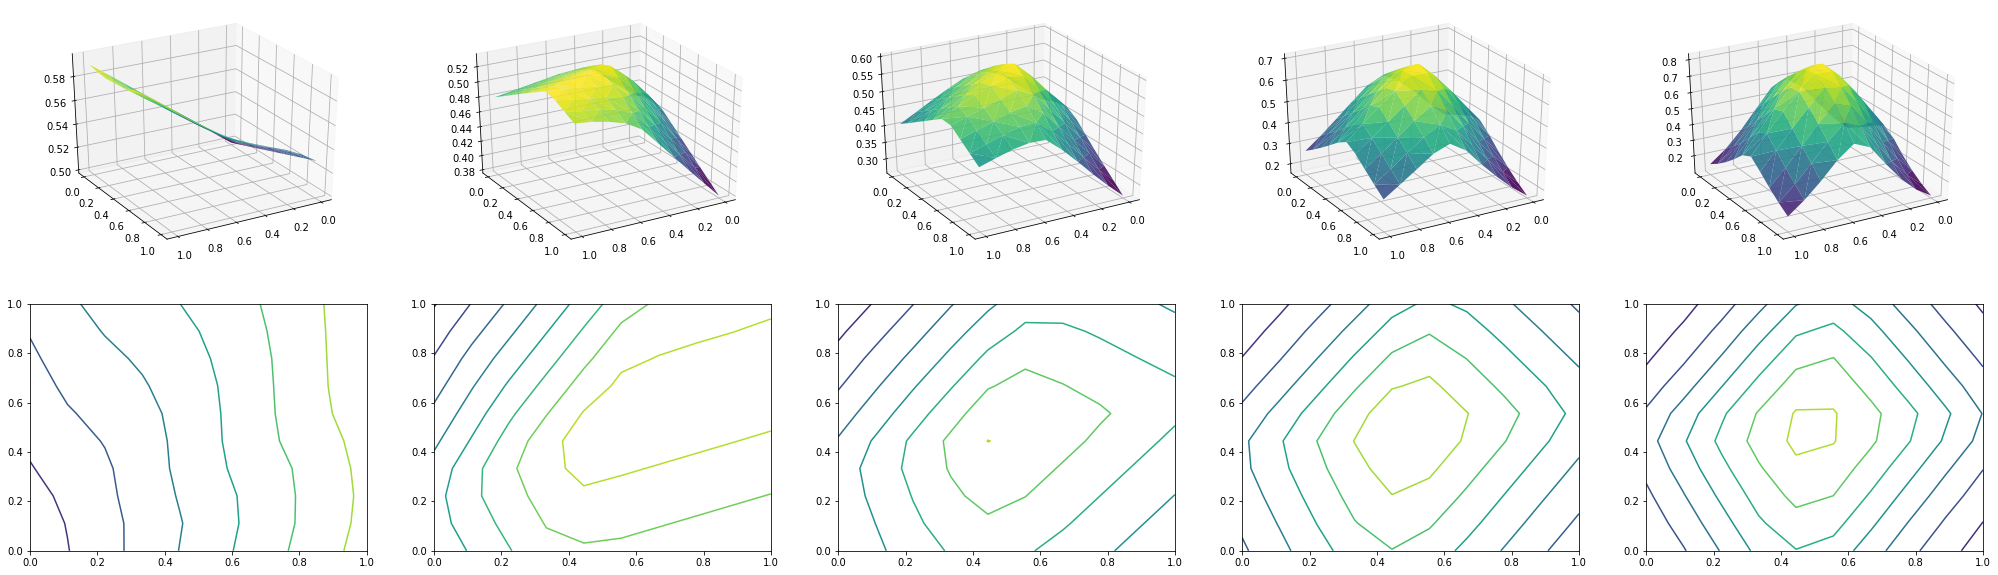

In [87]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(35,10))
for j in range(1,6):
  ax = fig.add_subplot(2,5,j, projection="3d")
  # xv.ravel().shape, probas[0].shape
  ax.plot_trisurf(xv.ravel(), yv.ravel(), probas[(j-1)*int(n_epoch/5)].ravel(), cmap="viridis", alpha=0.9)
  ax.view_init(30, 60)
  ax = fig.add_subplot(2,5,j+5)
  ax.contour(x, y, probas[(j-1)*int(n_epoch/5)].reshape((len(x),len(y))))
  